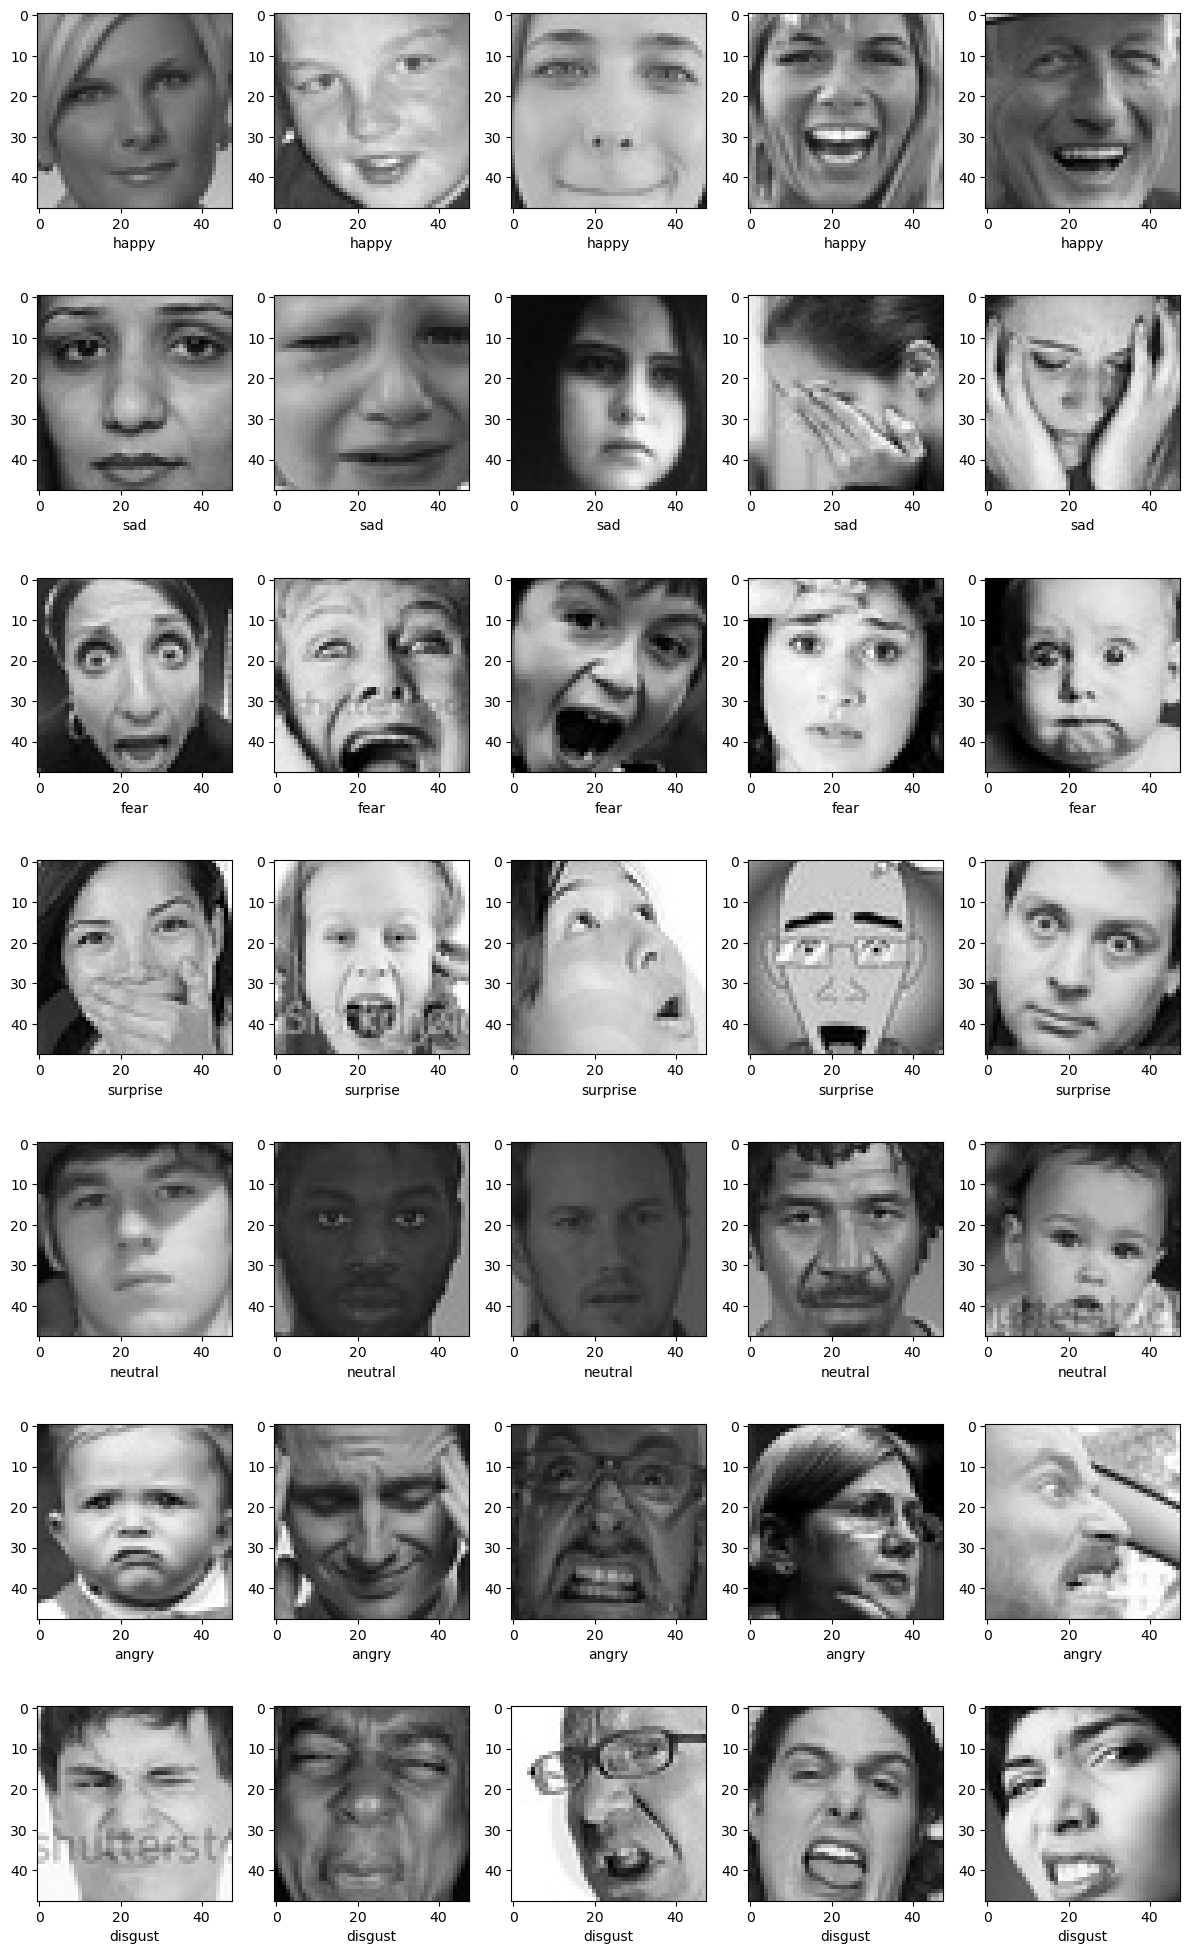

In [2]:
# displaying some images for every different expression

import numpy as np
import seaborn as sns
#from keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import load_img
import matplotlib.pyplot as plt
import os

# size of the image: 48*48 pixels
pic_size = 48



# input path for the images
base_path = "./data/train/"


plt.figure(0, figsize=(12,20))
cpt = 0

for expression in os.listdir(base_path):
    for i in range(1,6):
        cpt = cpt + 1
        plt.subplot(7,5,cpt)
        img = load_img(base_path + expression + "/" +os.listdir(base_path   + expression)[i], target_size=(pic_size, pic_size))
        plt.xlabel(expression)
        plt.imshow(img, cmap="gray")

plt.tight_layout()
plt.show()

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the path to the folder containing the training images
train_path = 'data/train/'

# Define the image size and batch size
img_height, img_width = 224, 224
batch_size = 32

# Create an ImageDataGenerator for data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255, # rescale pixel values to [0, 1]
    rotation_range=20, # randomly rotate images by up to 20 degrees
    width_shift_range=0.1, # randomly shift the image horizontally by up to 10%
    height_shift_range=0.1, # randomly shift the image vertically by up to 10%
    horizontal_flip=True, # randomly flip images horizontally
    zoom_range=0.1 # randomly zoom images by up to 10%
)

# Create a flow_from_directory generator for the training data
train_generator = train_datagen.flow_from_directory(
    train_path, # path to the training data folder
    target_size=(img_height, img_width), # resize the images to the specified size
    batch_size=batch_size, # set the batch size
    class_mode='categorical', # set the class mode to categorical
    shuffle=True # shuffle the data for training
)

# test data
test_path = 'data/test/'


Found 28709 images belonging to 7 classes.


In [ ]:
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers

# # Define the number of classes
# num_classes = 7

# # Define the model architecture
# model = keras.Sequential([
#     layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
#     layers.MaxPooling2D(pool_size=(2, 2)),
#     layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
#     layers.MaxPooling2D(pool_size=(2, 2)),
#     layers.Flatten(),
#     layers.Dense(128, activation='relu'),
#     layers.Dense(num_classes, activation='softmax')
# ])

# # Compile the model
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # Train the model
# model.fit(train_generator , epochs=10, validation_data=val_dataset)

# # Evaluate the model
# loss, accuracy = model.evaluate(test_dataset)
# print(f'Test loss: {loss}, Test accuracy: {accuracy}')


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the input shape and number of classes
input_shape = (224, 224, 3)
num_classes = 7

# Create a sequential model
model = Sequential()

# Add convolutional layers
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add a flatten layer and dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model with categorical crossentropy loss and Adam optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


2023-04-03 01:39:30.919748: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
# Set the number of training epochs
epochs = 10

# Train the model on the training data
history = model.fit(
    train_generator, # training data generator
    epochs=epochs, # number of epochs to train for
    verbose=1 # print training progress
)


Epoch 1/10
898/898 [==============================] - 1423s 2s/step - loss: 1.8337 - accuracy: 0.2499
Epoch 2/10
898/898 [==============================] - 1542s 2s/step - loss: 1.7537 - accuracy: 0.2801
Epoch 3/10
898/898 [==============================] - 1624s 2s/step - loss: 1.7241 - accuracy: 0.2969
Epoch 4/10
898/898 [==============================] - 1564s 2s/step - loss: 1.6675 - accuracy: 0.3320
Epoch 5/10
898/898 [==============================] - 1342s 1s/step - loss: 1.6403 - accuracy: 0.3505
Epoch 6/10
898/898 [==============================] - 1227s 1s/step - loss: 1.6220 - accuracy: 0.3604
Epoch 7/10
898/898 [==============================] - 1225s 1s/step - loss: 1.6087 - accuracy: 0.3726
Epoch 8/10
898/898 [==============================] - 1219s 1s/step - loss: 1.5988 - accuracy: 0.3745
Epoch 9/10
898/898 [==============================] - 1222s 1s/step - loss: 1.5830 - accuracy: 0.3793
Epoch 10/10
898/898 [==============================] - 2114s 2s/step - loss: 1.578

In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Dropout, LeakyReLU, Conv2D, Conv2DTranspose
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
import numpy as np

# Load the original dataset
# Replace this with your own dataset


# Normalize the pixel values to the range [-1, 1]
X_train = (train_generator.astype(np.float32) - 127.5) / 127.5

# Define the generator model
def build_generator(latent_dim):
    model = Sequential()

    # Input layer
    model.add(Dense(7*7*128, input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Reshape((7, 7, 128)))

    # Convolutional layers
    model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))

    # Output layer
    model.add(Conv2D(1, (7,7), activation='tanh', padding='same'))

    return model

# Define the discriminator model
def build_discriminator(img_shape):
    model = Sequential()

    # Convolutional layers
    model.add(Conv2D(64, (3,3), strides=(2,2), padding='same', input_shape=img_shape))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.25))
    model.add(Conv2D(128, (3,3), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.25))

    # Output layer
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))

    return model

# Define the GAN model
def build_gan(generator, discriminator):
    model = Sequential()

    # Add the generator and discriminator
    model.add(generator)
    model.add(discriminator)

    return model

# Define the image shape and latent dimension
img_shape = (28, 28, 1)
latent_dim = 100

# Build the generator, discriminator, and GAN models
generator = build_generator(latent_dim)
discriminator = build_discriminator(img_shape)
gan = build_gan(generator, discriminator)

# Compile the discriminator with binary crossentropy loss and Adam optimizer
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5), metrics=['accuracy'])

# Compile the GAN with binary crossentropy loss and Adam optimizer
gan.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))

# Train the GAN
epochs = 10
batch_size = 32

for epoch in range(epochs):

    # Generate random noise vectors
    noise = np.random.normal(0, 1, (batch_size, latent_dim))

    # Generate fake images using the generator
    gen_images = generator.predict(noise)

    # Get a batch of real images from the dataset
    real_images = X_train[np.random.randint(0, X_train.shape[0], batch_size)]

    # Concatenate the real and fake images
    images = np.concatenate([real_images, gen_images])

    # Labels for real and fake images
    real_labels = np.ones((batch_size, 1))
    fake_labels = np.zeros((batch_size, 1))

    # Label smoothing for real images
    real_labels *= 0.9 + np.random.random(real_labels.shape) * 0.1

    # Train the discriminator on the real and fake images
    d_loss_real = discriminator.train_on_batch(real_images, real_labels)
    d_loss_fake = discriminator.train_on_batch(gen_images, fake_labels)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    # Train the generator by trying to fool the discriminator
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    g_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))

    # Print the progress
    print(f"Epoch {epoch+1}/{epochs}, Discriminator Loss: {d_loss[0]}, Discriminator Accuracy: {100*d_loss[1]}, Generator Loss: {g_loss}")

    # Save a sample of the generated images every 100 epochs
    if (epoch+1) % 100 == 0:
        gen_images = generator.predict(np.random.normal(0, 1, (25, latent_dim)))
        gen_images = 0.5 * gen_images + 0.5 # Rescale to [0, 1]
        fig, axs = plt.subplots(5, 5)
        cnt = 0
        for i in range(5):
            for j in range(5):
                axs[i,j].imshow(gen_images[cnt,:,:,0], cmap='gray')
                axs[i,j].axis('off')
                cnt += 1
        fig.savefig(f"gan_images_epoch{epoch+1}.png")
        plt.close()



2023-04-03 14:38:03.725535: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


NameError: name 'train_generator' is not defined